# Классификация

Рассмотрим задачу классификации. Для простоты будем рассматривать только бинарную классификацию: для каждого примера в обучающей выборке указан его класс: 0 или 1.

Как можно решать такую задачу?

Самый простой путь -- обучить регрессию, предсказывающую эти значения: 0 или 1. Этот подход работает, но он несколько противоестественный: предположим, наша модель предсказала для объекта класса 1 значение 2. За такое предсказание она получит такой же штраф, как за предсказание 0: $(2-1)^2 = (0-1)^2$.

Давайте попробуем придумать более естественную функцию потерь. Естественно считать, что чем больше предсказание нашей модели, тем сильнее она уверена, что объект принадлежит классу 1. Давайте попробуем интерпретировать предсказание модели как вероятность того, что объект принадлежит классу 1.

Модель (теоретически) может выдавать значения от минус до плюс бесконечности, значит нам нужно научиться превращать интервал $(-\infty, \infty)$ в интервал $(0, 1)$. Такие функции называют сигмоидами -- потому что они напоминают внешне букву s. Наиболее стандартная такая функция называется логистической функцией и выглядит так:
$$
 \sigma(x) = \frac{1}{1 + e^{-x}}
$$

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt 
import numpy as np

In [68]:
# сигмоидная функция

def sigma(x):
    return 1.0 / (1 + np.exp(-x))

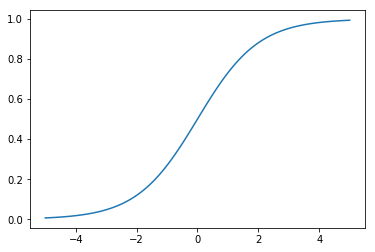

In [3]:
x = np.linspace(-5, 5, 100)
plt.plot(x, sigma(x))

Итак, можно считать, что если наша модель предсказывает для объекта x число f(x) это означает, что p_x = $\sigma(f(x))$ -- вероятность того, что объект принадлежит к классу x.

Для данного примера класса 1 вероятность того, что наша модель угадала правльно равна $p_x$, для примера класса 1 эта вероятность равна $1-p_x$. 

Давайте посчитаем вероятность того, что наша модель "угадает" значение для всех элементов будет равна 

$$\prod_{x \in 1} p_x \prod_{x \in 0} (1-p_x)$$

Мы хотим максимизировать эту вероятность.

Работать с произведением неудобно, поэтому возьмем логарифм:

$$\sum_{x \in 1} \ln(p_x)  + \sum_{x \in 0} \ln(1-p_x)$$

Это выражение (со знаком минус) называется LogLoss. Оказывается, что его довольно просто оптимизировать. Соответсвующая модель в sklearn называется

In [7]:
from sklearn import linear_model, datasets 

log_reg = linear_model.LogisticRegression() 

In [8]:
import pandas as pd
import numpy as np

Мы будем работать с датасетом, содержащим данные о порядка 18 тысячах звезд, некоторые из которых являются пульсарами.

In [9]:
data = pd.read_csv('pulsar_stars.csv')

X = data.drop(columns=['target_class']) #убираем столбец с целевой переменной
Y = data['target_class']

In [10]:
data.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [13]:
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [15]:
from sklearn.model_selection import train_test_split

# разюиваем данные на обучающую и тестовую части
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

Давайте обучим логистическую регрессию:

In [16]:
log_reg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Обратите внимание на первый параметр С -  он отвечает за регуляризацию: меньшие значения С соответствуют большим штрафам за "усложнение" модели.

In [17]:
pred = log_reg.predict(X_test)
pred

array([0, 1, 0, ..., 0, 0, 0])

Функция predict возвращает класс примера. При желании можно посмотреть и на вероятности, которые возвращает наша модель:

In [18]:
log_reg.predict_proba(X_test)

array([[  9.93950917e-01,   6.04908332e-03],
       [  2.68578464e-01,   7.31421536e-01],
       [  9.83093421e-01,   1.69065786e-02],
       ..., 
       [  9.99031039e-01,   9.68960534e-04],
       [  9.95464767e-01,   4.53523331e-03],
       [  9.98889549e-01,   1.11045124e-03]])

LogLoss полезен для обучения логистической регресси, но дает довольно мало понимания, насколько хорошо работает наш классификатор. Давайте рассмотрим более понятные метрики нашего классификатора.

Самой естественной метрикой является доля правильно предсказанных пар. Эта метрика называется accuracy:
    

In [20]:
accuracy = np.mean(pred == Y_test)
accuracy

0.97883866598950398

Выглядит, как будто наш классификатор работает весьма неплохо. Но давайте посмотрим, каким было бы качество, если бы мы просто всегда говорили, что звезда не является пульсаром (константное предсказание):

In [52]:
accuracy_dumb = np.mean(np.zeros(y_test.shape) == y_test)
accuracy_dumb

0.9109531064838328

Хуже, но не кардинально хуже. Дело в том, что классы в нашем наборе данных сильно несбалансированы: бОльшая часть (около 90%) звезд не является пульсаром:

In [14]:
from collections import Counter

Counter(data['target_class'])

Counter({0: 16259, 1: 1639})

Чтобы обойти эту проблему часто рассматривают две другие метрики precision (точность) и recall (полнота). Точность -- доля объектов класса 1 среди всех объектов, которые наш классификатор отнес к классу 1. Полнота -- доля объектов класса 1, которые наш классификатор определил правильно среди всех объектов класса 1:

In [22]:
precision = np.sum((pred == 1) & (Y_test==1)) / np.sum(pred == 1)
precision

0.93492407809110634

In [23]:
recall = np.sum((pred == 1) & (Y_test==1)) / np.sum(Y_test == 1)
recall

0.81939163498098855

Часто для того, чтобы учесть несбалансированность нашего множества, мы можем задать разный вес для разных классов

In [24]:
log_reg_w = sklearn.linear_model.LogisticRegression(class_weight = {0 : 1, 1 : 10})

In [25]:
log_reg_w.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight={0: 1, 1: 10}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [26]:
pred_w = log_reg_w.predict(X_test)

In [27]:
precision = np.sum((pred_w == 1) & (Y_test==1)) / np.sum(pred_w == 1)
precision

0.76311605723370435

In [28]:
recall = np.sum((pred_w == 1) & (Y_test==1)) / np.sum(Y_test == 1)
recall

0.9125475285171103

Точность классификатора заметно упала -- он стал чаще говорить "1", но зато заметно возросла полнота. Хорошо это или плохо -- зависит от того, как мы собираемся использовать наш классификатор. 
Если для нас очень важно не пропустить ни одного пульсара (а если мы какую-то звезду тоже назовем пульсаром по ошибке) нам нужно растить полноту -- это возможно, например, если потом на выбранные звезды посмотрят в радиотелескоп и уточнят предсказание.
Может быть, что для нас важно не назвать пульсаром звезду, которая им не является (например, ко всем потенциальным пульсарам мы отправим дорогой исследовательский зонд -- не страшно пропустить какие-то, но очень обидно отправить зонд к не-пульсару).


Для полноты картины введем еще два определения:
    - ошибка первого рода (Type I error, false positive) -- ситуация, когда наша модель отнесла объект класса 0 к классу 1
    - ошибка второго рода (Type II error, false negative) -- ситуация, когда наша модель отнесла объект класса 1 к классу 0
    
Аналогично правильные предсказания можно разделить на true positives и true negatives

|  | y = 1   | y = 0 |
|------|------|------|
|   __p(x) = 1__  | TP (true positive)| FP (false positive)|
| | | |
|   __p(x) = 0__ | FN (false negative)|TN (true negative |

__Задание:__ запишите accuracy, precision и recall в терминах количества ошибок первого и второго рода (FP и FN) и количества правильных предсказаний (TP, TN)

Существует метрика, объединяющая точность и полноту - их среднее гармоническое. Эта метрика называется F-мерой:

$$ F = \frac{2\ precision  \cdot recall}{precision+recall}$$

## Kaggle: предсказание победителя в матче Dota.

Существует целое направление, посвященное предсказанию победителя в Доте - Dota Science.

Ниже представлен датасет с описанием первых пяти минут матча игры, по которому нужно предсказать победившую команду.

Контест на kaggle https://www.kaggle.com/c/dota-science/, файл с обучающей выборкой (dota_train) можно взять на нашей шаре

In [58]:
dota = pd.read_csv('dota_train.csv')

dota.head()

,match_id,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,...,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
0,89521,1449022680,1,85,3,1010,1033,12,0,0,...,4,2,2,23.0,2703,0,1542,1958,3,63
1,28667,1440850895,1,7,1,277,500,0,0,0,...,5,3,1,-22.0,925,0,1972,2047,63,63
2,67410,1447292420,1,14,2,484,1052,1,1,0,...,3,2,0,12.0,2774,1,1926,256,63,48
3,63501,1447029895,1,100,4,1474,830,8,0,0,...,5,3,1,-34.0,1497,0,1958,1975,63,63
4,29249,1441033449,0,71,3,926,1158,2,1,0,...,4,2,0,-10.0,3099,1,1574,388,15,51


#### Описание признаков в таблице

- `match_id`: идентификатор матча в наборе данных
- `start_time`: время начала матча (unixtime)
- `lobby_type`: тип комнаты, в которой собираются игроки (расшифровка в `dictionaries/lobbies.csv`)
- Наборы признаков для каждого игрока (игроки команды Radiant — префикс `rN`, Dire — `dN`):
    - `r1_hero`: герой игрока (расшифровка в dictionaries/heroes.csv)
    - `r1_level`: максимальный достигнутый уровень героя (за первые 5 игровых минут)
    - `r1_xp`: максимальный полученный опыт
    - `r1_gold`: достигнутая ценность героя
    - `r1_lh`: число убитых юнитов
    - `r1_kills`: число убитых игроков
    - `r1_deaths`: число смертей героя
    - `r1_items`: число купленных предметов
- Признаки события "первая кровь" (first blood). Если событие "первая кровь" не успело произойти за первые 5 минут, то признаки принимают пропущенное значение
    - `first_blood_time`: игровое время первой крови
    - `first_blood_team`: команда, совершившая первую кровь (0 — Radiant, 1 — Dire)
    - `first_blood_player1`: игрок, причастный к событию
    - `first_blood_player2`: второй игрок, причастный к событию
- Признаки для каждой команды (префиксы `radiant_` и `dire_`)
    - `radiant_bottle_time`: время первого приобретения командой предмета "bottle"
    - `radiant_courier_time`: время приобретения предмета "courier" 
    - `radiant_flying_courier_time`: время приобретения предмета "flying_courier" 
    - `radiant_tpscroll_count`: число предметов "tpscroll" за первые 5 минут
    - `radiant_boots_count`: число предметов "boots"
    - `radiant_ward_observer_count`: число предметов "ward_observer"
    - `radiant_ward_sentry_count`: число предметов "ward_sentry"
    - `radiant_first_ward_time`: время установки командой первого "наблюдателя", т.е. предмета, который позволяет видеть часть игрового поля
- Итог матча (данные поля отсутствуют в тестовой выборке, поскольку содержат информацию, выходящую за пределы первых 5 минут матча)
    - `duration`: длительность
    - `radiant_win`: 1, если победила команда Radiant, 0 — иначе
    - Состояние башен и барраков к концу матча (см. описание полей набора данных)
        - `tower_status_radiant`
        - `tower_status_dire`
        - `barracks_status_radiant`
        - `barracks_status_dire`

In [59]:
dota.shape

(65144, 109)

In [60]:
# целевая переменная 

Y = dota['radiant_win']
Y.shape

(65144,)

Для всех матчей из тестового набора предскажите вероятность победы Radiant, запишите предсказания в CSV файл с колонками `match_id` (идентификатор матча) и `radiant_win` — предсказанная вероятность. Файл с предсказаниями должен выглядеть примерно следующим образом:

```
match_id,radiant_win
1,0.51997370502
4,0.51997370502
15,0.51997370502
...
```